In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
df = pd.read_csv('CTC-SP2_ACTUAL_22_12.csv')
for i in range(len(df.iloc[:,1])):
    sns.plot(df.iloc[i, :])



AttributeError: module 'seaborn' has no attribute 'plot'

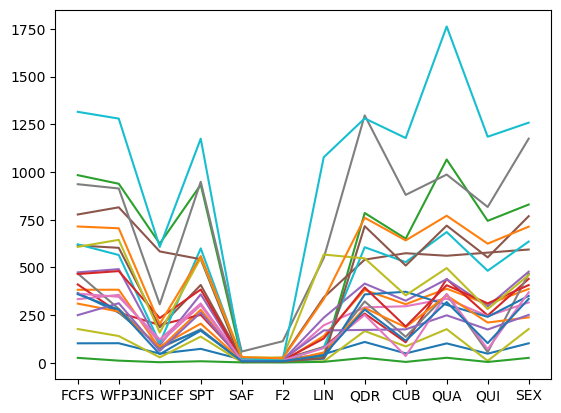

In [14]:
df = pd.read_csv('CTC-SP2_ESTIMATED_22_12.csv')
for i in range(len(df.iloc[:,1])):
    plt.plot(df.iloc[i, :])


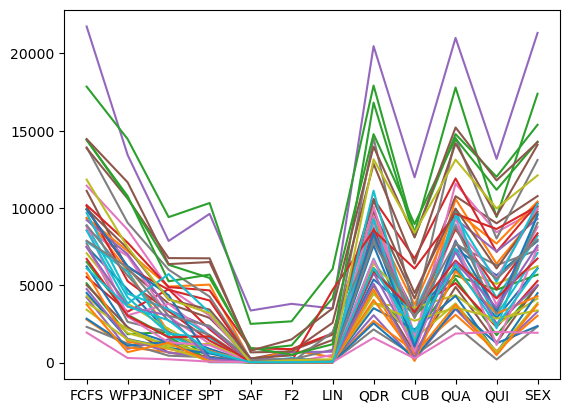

In [16]:
df = pd.read_csv('LUBLIN 256_ACTUAL_50_12.csv')
for i in range(len(df.iloc[:,1])):
    plt.plot(df.iloc[i, :])


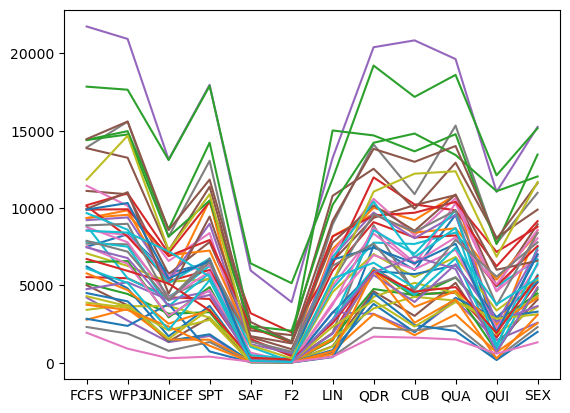

In [17]:
df = pd.read_csv('LUBLIN 256_ESTIMATED_50_12.csv')
for i in range(len(df.iloc[:,1])):
    plt.plot(df.iloc[i, :])
